In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Datasets/mass_shooting_events_stanford_msa_release_06142016.csv')
data.shape

(347, 48)

In [4]:
data.head()

,CaseID,Title,Location,City,State,Latitude,Longitude,Number of Victim Fatalities,Total Number of Fatalities,Number of Victims Injured,Total Number of Victims,Description,Date,Day of Week,Date - Detailed,Shooter Name,Shooter Age(s),Average Shooter Age,Shooter Sex,Shooter Race,Type of Gun - Detailed,Type of Gun - General,Number of Shotguns,Number of Rifles,Number of Handguns,Total Number of Guns,Number of Automatic Guns,Number of Semi-Automatic Guns,Fate of Shooter at the scene,Shooter's Cause of Death,School Related,Place Type,Relationship to Incident Location,Targeted Victim/s - Detailed,Targeted Victim/s - General,Possible Motive - Detailed,Possible Motive - General,History of Mental Illness - Detailed,History of Mental Illness - General,Data Source 1,Data Source 2,Data Source 3,Data Source 4,Data Source 5,Data Source 6,Data Source 7,Military Experience,Class
0,1.0,University of Texas at Austin,"Austin, Texas",Austin,Texas,30.198887,-97.844159,16.0,17.0,32.0,48.0,"On August 1, 1966, a 25-year-old engineering s...",8/1/1966,Monday,"Monday, August 01, 1966",Charles S. Whitman,25,25,Male,White American or European American,"Remington 700 ADL (6mm), Universal M1 carbine,...",Multiple guns,1,3,3,7,0,1,Deceased,Killed,Yes,College/University/Adult education,Place of schooling,"Family, students, teachers, and police",General public,A task force of professionals known as the Con...,Mental illness,Shooter had visited a psychiatrist and severa...,Yes,http://en.wikipedia.org/wiki/Charles_Whitman,"Lexington Examiner (KY) - September 23, 2012",http://news.google.com/newspapers?id=lkk0AAAAI...,http://news.google.com/newspapers?id=PPUjAAAAI...,http://books.google.com/books?id=ClYEAAAAMBAJ&...,NaN,NaN,Yes,SPK
1,2.0,Rose-Mar College of Beauty,"Mesa, Arizona",Mesa,Arizona,33.422687,-111.816320,5.0,5.0,1.0,6.0,"On November 12, 1966, an 18-year-old high scho...",11/12/1966,Saturday,"Saturday, November 12, 1966",Robert Benjamin Smith,18,18,Male,White American or European American,.22 caliber pistol,Handgun,0,0,1,1,0,0,Arrested,Not applicable,Yes,College/University/Adult education,None,"Four beauty school students, one client, and h...",Students/Classmates/Teacher,"When he was being arrested, the shooter announ...",Mental illness,Diagnosed as schizophrenic. Possible psychopathy,Yes,"""Slaughter In The College Of Beauty."" Time 88....",Section: Lexington True Crime Examiner,http://www.nydailynews.com/news/crime/beauty-s...,http://books.google.com/books?id=Cre7qsswRiwC&...,NaN,NaN,NaN,Unknown,MS
2,3.0,New Orleans Police Shootings,"New Orleans, Louisiana",New Orleans,Louisiana,30.068724,-89.931474,9.0,10.0,13.0,22.0,"On New Year's Eve in 1972, a 23-year-old ex-Na...",12/31/72,Sunday,"Sunday, December 31, 1972",Mark James Robert Essex,23,23,Male,Black American or African American,5-shot Ruger Model 44 (.44 caliber) semi-autom...,Multiple guns,0,1,1,2,0,1,Deceased,Killed,No,Government facility,Local government,Police officers and members of the public,Government,The shooter claimed he was subjected to two ye...,Race,"During his time at the US Navy, the shooter si...",Yes,http://news.google.com/newspapers?nid=1144&dat...,http://theadvocate.com/home/4828836-125/rampag...,http://www.trutv.com/library/crime/notorious_m...,http://books.google.com/books?id=TfEDmROcZwEC&...,NaN,NaN,NaN,Unknown,SPK
3,4.0,Clara Barton Elementary School,"Chicago, Illinois",Chicago,Illinois,41.839280,-87.688181,1.0,1.0,3.0,4.0,"On January 17, 1974, a 14-year-old student ent...",1/17/74,Thursday,"Thursday, January 17, 1974",Steven Guy,14,14,Male,Unknown,".38 caliber snub-nose revolver, .45 caliber pi...",Handgun,0,0,2,2,0,0,Arrested,Not applicable,Yes,Primary school,Place of schooling,"School principal, teachers, and school guard",Students/Classmates/Teacher,"Former student, upset at being expelled and pl...",Expulsion/Suspension,The student was acquitted of murder charges by...,Yes,http://news.google.com/newspapers?nid=1338&dat...,http://news.google.com/newspapers?nid=1144&dat...,

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CaseID                                307 non-null    float64
 1   Title                                 307 non-null    object 
 2   Location                              307 non-null    object 
 3   City                                  307 non-null    object 
 4   State                                 307 non-null    object 
 5   Latitude                              307 non-null    float64
 6   Longitude                             307 non-null    float64
 7   Number of Victim Fatalities           307 non-null    float64
 8   Total Number of Fatalities            307 non-null    float64
 9   Number of Victims Injured             307 non-null    float64
 10  Total Number of Victims               307 non-null    float64
 11  Description        

In [6]:
# По-видимому в датафрейме есть строки, полностью состоящие из значений Nan
data[data.isna().all(axis=1)].shape

(40, 48)

In [7]:
# Удалим их
data.dropna(axis=0, how='all', inplace=True)

In [8]:
# Посмотрим, какие данные содержатся в колонках типа 'object', сколько разных значений и разных типов данных они
# содержат. Это поможет выбрать колонки для более подробного рассмотрения.
for col in [col for col in data.columns.tolist() if data[col].dtype=='object']:
    print(col, data[col].unique().shape[0], data[col].apply(type).unique())

Title 306 [<class 'str'>]
Location 243 [<class 'str'>]
City 237 [<class 'str'>]
State 48 [<class 'str'>]
Description 307 [<class 'str'>]
Date 273 [<class 'str'>]
Day of Week 7 [<class 'str'>]
Date - Detailed 284 [<class 'str'>]
Shooter Name 274 [<class 'str'>]
Shooter Age(s) 76 [<class 'str'>]
Average Shooter Age 62 [<class 'str'>]
Shooter Sex 4 [<class 'str'>]
Shooter Race 10 [<class 'str'>]
Type of Gun - Detailed 205 [<class 'str'> <class 'float'>]
Type of Gun - General 7 [<class 'str'>]
Number of Shotguns 4 [<class 'str'>]
Number of Rifles 6 [<class 'str'>]
Number of Handguns 9 [<class 'str'>]
Total Number of Guns 10 [<class 'str'>]
Number of Automatic Guns 5 [<class 'str'>]
Number of Semi-Automatic Guns 7 [<class 'str'>]
Fate of Shooter at the scene 6 [<class 'str'>]
Shooter's Cause of Death 5 [<class 'str'>]
School Related 5 [<class 'str'>]
Place Type 27 [<class 'str'>]
Relationship to Incident Location 12 [<class 'str'> <class 'float'>]
Targeted Victim/s - Detailed 267 [<class 's

### Особенности преступников
Посмотрим, как распределены данные, относящиеся к личным характеристикам преступников.

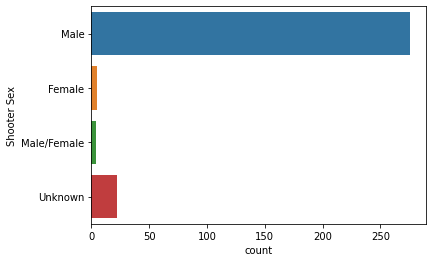

In [9]:
# Пол
sns.countplot(y=data['Shooter Sex'])

In [10]:
# Что означает смешанный или неизвестный пол?
data[data['Shooter Sex'].isin(('Male/Female', 'Unknown'))][['Shooter Name', 'Shooter Sex']]

,Shooter Name,Shooter Sex
104,Michele K. Anderson and Joseph Thomas McEnroe,Male/Female
162,Jerad Miller and Amanda Miller,Male/Female
178,"Christopher Lee Duncan, Dora Delgado",Male/Female
235,Syed Rizwyan Farook\rTashfeen Malik,Male/Female
248,The unidentified shooter escaped.,Unknown
255,Unknown,Unknown
259,Unknown,Unknown
265,Unknown,Unknown
266,Unknown,Unknown
268,Unknown,Unknown


In [11]:
# Какова мотивация преступников в разнополых парах?
for item in data[data['Shooter Sex'] == 'Male/Female']['Possible Motive - Detailed'].items():
    print(item)

(104, "The shooters had an ongoing financial conflict with the victims, in that they had been living in a mobile home on one shooters' parents' property and the parents requested that they pay rent.")
(162, 'The shooters held anti-government beliefs, which lead them to choose police officers as their victims. The third victim was an armed civilian that attempted to stop the shooters.')
(178, 'Drug use or drug deal, Sheriff told reporters that it appears to be a targeted hit over drugs.')
(235, 'The man had been in touch via phone and social media with at least one person whom the FBI suspected of international terrorism. It appears the man was radicalized, which contributed to his motive, though other things -- such as workplace grievances -- may have also played a role.\rIt may have been inspired by ISIS.')


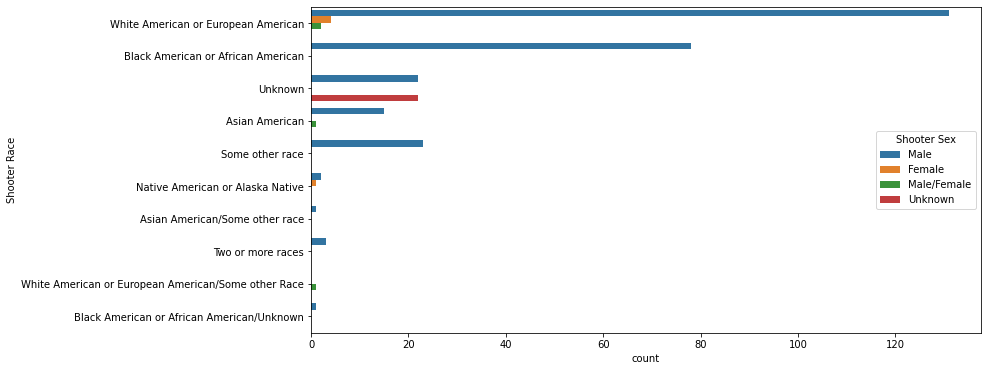

In [12]:
# Расовая принадлежность и доля представителей разных полов для каждой расы
plt.figure(figsize=(12, 6))
sns.countplot(y=data['Shooter Race'], hue=data['Shooter Sex'])

Большинство женщин-преступников принадлежит к европеоидной расе, хотя это может быть связано с тем, что доля европеоидов среди преступников в принципе преобладает.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


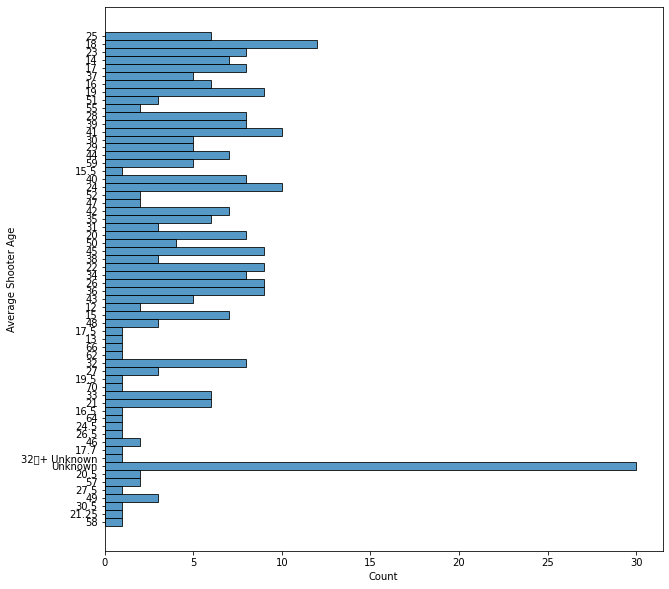

In [13]:
# Средний возраст
plt.figure(figsize=(10, 10))
sns.histplot(y=data['Average Shooter Age'])

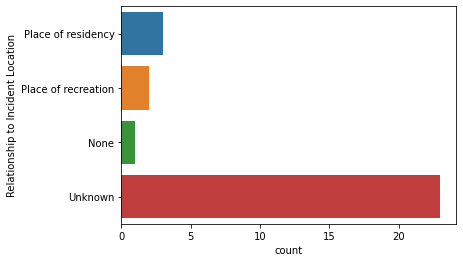

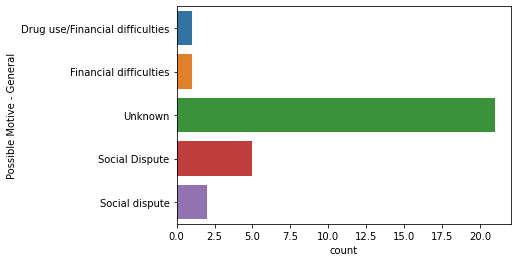

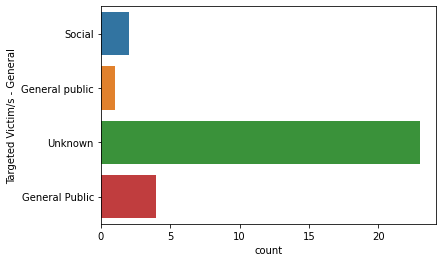

In [14]:
# Где происходили случаи, в которых возраст преступника остался неизвестным
# Каков в этих случаях был мотив преступления
# Что известно о жертвах в этих случаях
sns.countplot(y='Relationship to Incident Location', data=data[data['Average Shooter Age']=='Unknown'])
plt.show()
sns.countplot(y='Possible Motive - General', data=data[data['Average Shooter Age']=='Unknown'])
plt.show()
sns.countplot(y='Targeted Victim/s - General', data=data[data['Average Shooter Age']=='Unknown'])

По-видимому, возраст преступника остался невыясненным в тех случаях, когда о преступлении было в целом недостаточно информации, либо когда преступление произошло спонтанно и между преступниками и их жертвами не было явных связей.

In [15]:
# Можно заметить, что в колонках с мотивом, местом преступления и жертвами есть некорректные значения
print(data['Possible Motive - General'].unique())
print(data['Relationship to Incident Location'].unique())
print(data['Targeted Victim/s - General'].unique())

['Mental illness' 'Race' 'Expulsion/Suspension' 'Social dispute' 'Unknown'
 'Multiple motives' 'Financial difficulties' 'Harassment' 'Failure'
 'Rejection' 'Terminated/Denied/Reprimanded' 'Financial dispute'
 'Political/Religious ideals' 'Legal dispute' 'Domestic dispute'
 'Drug use' 'Drug use/Financial difficulties' 'Gender' 'Robbery'
 'Domestic Dispute' 'Social Dispute' nan]
['Place of schooling' 'None' 'Local government'
 'Place of business/employment' 'Place of residency' 'Place of recreation'
 'Unknown' 'Place of business/employment\rPlace of residency'
 'Residential home/Neighborhood' 'Place of Residency' nan
 'Place of Business/employment']
['General public' 'Students/Classmates/Teacher' 'Government'
 'Colleague/Workmate/Business acquaintance' 'Social'
 'Students/Classmates/Teacher\rand Government'
 'General public\rand Government'
 'Colleague/Workmate/Business acquaintance\rand Family' 'Family'
 'Racial/Religious group' 'Romantic partner' 'Unknown' 'Family/Social'
 'Racial/Reli

In [16]:
# Заменим некорректные значения для удобства дальнейшей работы
data['Possible Motive - General'].replace('Domestic dispute', 'Domestic Dispute', inplace=True)
data['Possible Motive - General'].replace('Social dispute', 'Social Dispute', inplace=True)
data['Possible Motive - General'].fillna('Unknown', inplace=True)
data['Relationship to Incident Location'].replace('Place of residency', 'Place of Residency', inplace=True)
data['Relationship to Incident Location'].replace('Place of business/employment', 'Place of Business/employment', inplace=True)
data['Relationship to Incident Location'].replace('None', 'Unknown', inplace=True)
data['Relationship to Incident Location'].fillna('Unknown', inplace=True)
data['Targeted Victim/s - General'].replace('General public', 'General Public', inplace=True)
data['Targeted Victim/s - General'].replace('None', 'Unknown', inplace=True)
data['Targeted Victim/s - General'].fillna('Unknown', inplace=True)

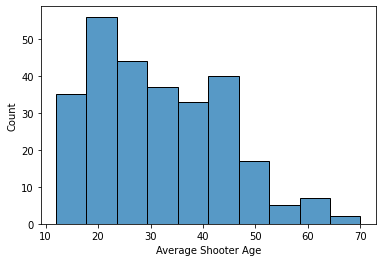

In [17]:
# Распределенние среднего возраста преступников в тех случаях, когда он был известен
sns.histplot(x=data[data['Average Shooter Age'].apply(lambda x: not any([sym.isalpha() for sym in x]))]['Average Shooter Age'].astype(float))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


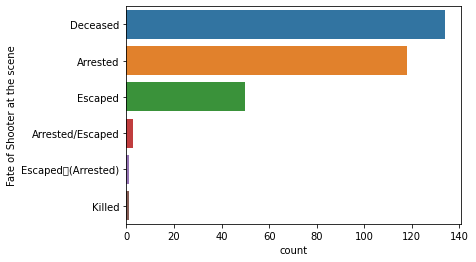

In [18]:
# Исход происшествия для преступника
sns.countplot(y=data['Fate of Shooter at the scene'])

In [19]:
print(data[data['Fate of Shooter at the scene'] == 'Killed']['Description'].iloc[0])
# Значение "Killed" вероятно указано здесь по ошибке, так как более логично отнести этот случай к "Deceased"
data['Fate of Shooter at the scene'].replace('Killed', 'Deceased', inplace=True)

On Friday, 90 minutes after receiving a court order over domestic violence, the man returned to the factory for the shooting spree.The man who wounded three people before storming into the central Kansas the lawn mower factory where he worked and shooting 14 others, killing three of them, had just been served a protection from abuse order that likely triggered the attack. Police say they believe the man fired at random while he was returning to his workplace.


In [20]:
# Что происходило в случаях, для которых одновременно указаны значения "Escaped" и "Arrested"
fates = 'Arrested/Escaped', 'Escaped\r(Arrested)'
for item in data[data['Fate of Shooter at the scene'].isin(fates)][['Fate of Shooter at the scene', 'Description']].iterrows():
    print('\t'.join(item[1].tolist()))

Arrested/Escaped	On June 29, 2014, two men were having an argument on Bourbon Street, which escalated into a gunfight. Many shots were fired into the surrounding crowd, killing one and injuring nine.
Arrested/Escaped	On the morning of January 24, 2015, two shooters opened fire at a party outside a home in Omaha. Three were killed and five others were injured. One of the suspected shooters was arrested, but the other has not been identified. Possibly gang-related.
Arrested/Escaped	On April 7, 2015, the man entered 20 Copeland St. about 11:10 p.m. Tuesday and demanded cash from one of victim. The man then fired a handgun at the victim, killing him. Police said at least two men intended to rob people at the Copeland Street home.
(Arrested)	On Saturday of November 7, 2015,a pregnant mother of two was killed in a violent rampage early Saturday along with her unborn child. Both of her toddlers were also shot. The shooter is the father of one of the small children.


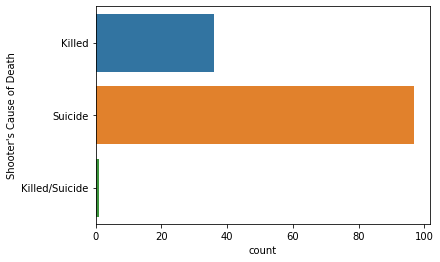

In [21]:
# Причина смерти (в случае гибели преступника)
sns.countplot(y=data[data["Shooter's Cause of Death"].str.lower()!= 'not applicable']["Shooter's Cause of Death"])

In [22]:
# Что происходило в случаях, для которых указано и убийство, и самоубийство
for item in data[data["Shooter's Cause of Death"] == 'Killed/Suicide']['Description'].items():
    print(item)

(162, 'On the afternoon of June 8, 2014, a man and his wife approached two police officers having lunch in Las Vegas and began shooting, killing them both. The couple then fled to Walmart, where they killed an armed civilian attempting to stop the shooters. The man was killed by police and the woman killed herself at the Walmart.')


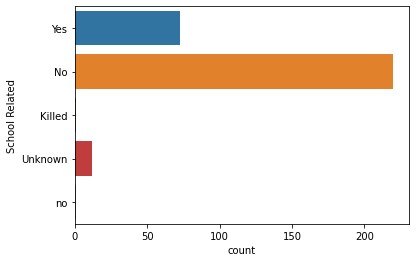

In [23]:
# Связано ли со школой
sns.countplot(y=data['School Related'])

In [24]:
# В этой колонке содержатся некорректные значения
data['School Related'].replace('no', 'No', inplace=True)
data['School Related'].replace('Killed', 'Unknown', inplace=True)

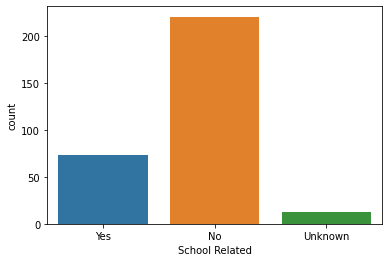

In [25]:
sns.countplot(x=data['School Related'])

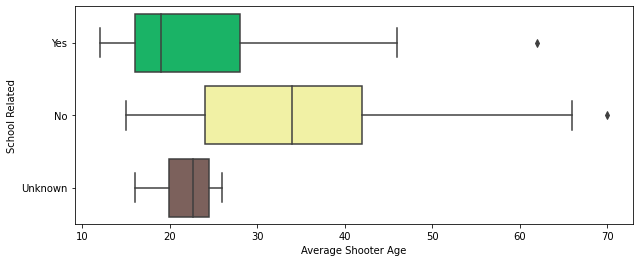

In [26]:
# Средний возраст преступника(ов) в зависимости от того, связано ли преступление со школой
filtered = data[data['Average Shooter Age'].apply(lambda x: not any([sym.isalpha() for sym in x]))]
plt.figure(figsize=(10, 4))
sns.boxplot(x=filtered['Average Shooter Age'].astype(float), y=filtered['School Related'], palette='terrain')

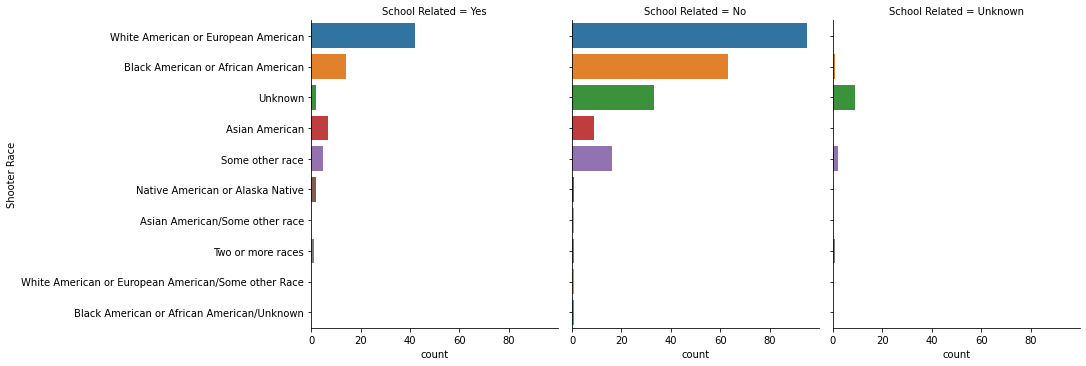

In [27]:
# Как соотносятся связь преступления со школой и расовая принадлежность преступника
sns.catplot(y='Shooter Race', col='School Related', data=data, kind='count')

Хотя доля европеоидов среди преступников преобладает в целом, для случаев, имеющих отношение к школе, доля белых преступников еще больше.

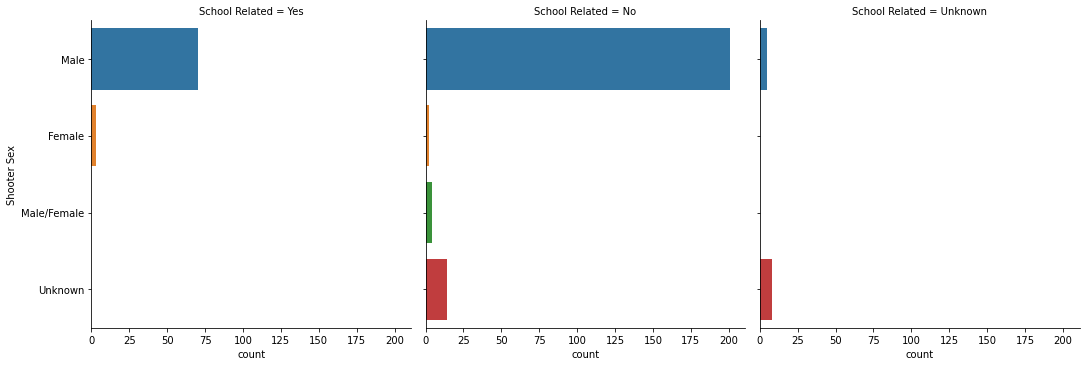

In [28]:
# Как соотносятся связь со школой и пол преступника
sns.catplot(y='Shooter Sex', col='School Related', data=data, kind='count')

В преступлениях, имеющих отношение к школе, не участвуют разнополые группы преступников.

In [29]:
# Посмотрим более детально, как соотносятся расовая и половая принадлежность преступника и связь преступления со школой.
data.pivot_table(index=['Shooter Race', 'Shooter Sex'], columns=['School Related'], aggfunc=np.count_nonzero)['CaseID'].fillna(0)

School Related                                                    No  ...   Yes
Shooter Race                                       Shooter Sex        ...      
Asian American                                     Male          8.0  ...   7.0
                                                   Male/Female   1.0  ...   0.0
Asian American/Some other race                     Male          1.0  ...   0.0
Black American or African American                 Male         63.0  ...  14.0
Black American or African American/Unknown         Male          1.0  ...   0.0
Native American or Alaska Native                   Female        1.0  ...   0.0
                                                   Male          0.0  ...   2.0
Some other race                                    Male         16.0  ...   5.0
Two or more races                                  Male          1.0  ...   1.0
Unknown                                            Male         19.0  ...   2.0
                                                   Unknown      14.0  ...   0.0
White American or European American                Female        1.0  ...   3.0
                                                   Male         92.0  ...  39.0
                                                   Male/Female   2.0  ...   0.0
White American or European American/Some other ... Male/Female   1.0  ...   0.0

[15 rows x 3 columns]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


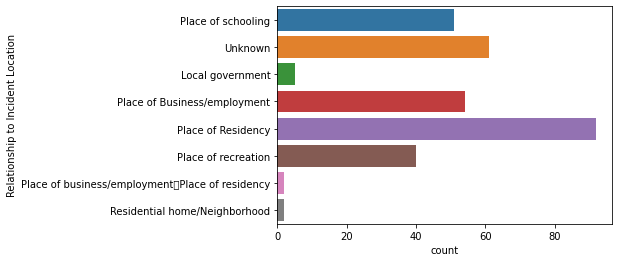

In [30]:
# Отношение преступника к месту происшествия
sns.countplot(y=data['Relationship to Incident Location'])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


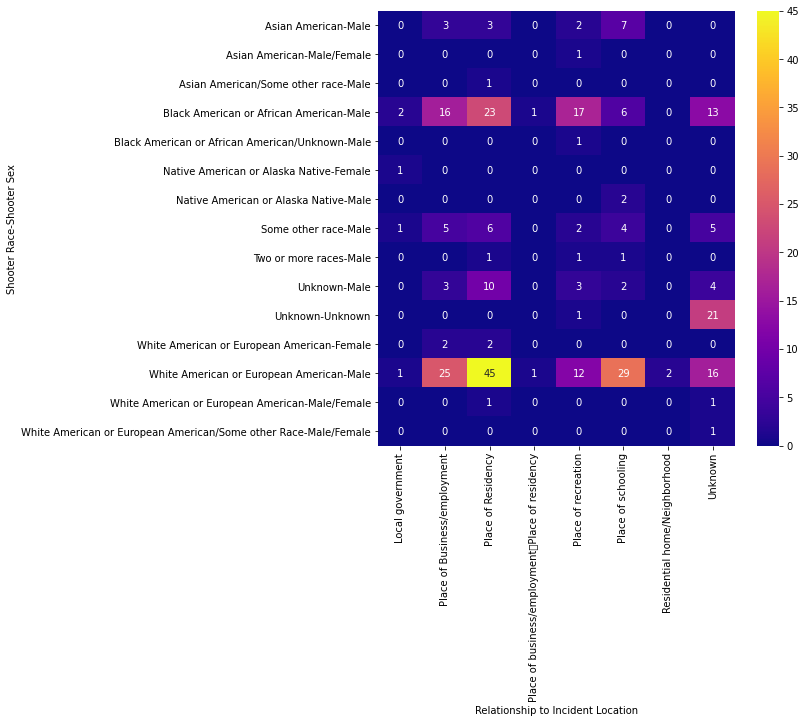

In [31]:
# Зависимость между расовой и половой принадлежностью преступника и местом преступления
table = data.pivot_table(index=['Shooter Race', 'Shooter Sex'], 
                         columns=['Relationship to Incident Location'],
                         aggfunc=np.count_nonzero)['CaseID'].fillna(0)
plt.figure(figsize=(8, 8))
sns.heatmap(table, cmap='plasma', annot=True)

Картина на диаграмме только подтверждает то, что среди преступников преобладают европеоиды и чернокожие мужского пола, а также то, что чаще всего преступник выбирал для совершения преступления место своего обучения, работы или проживания.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


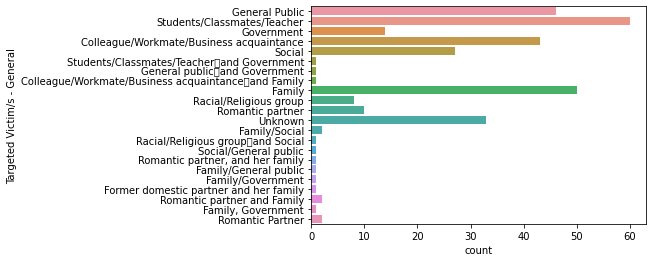

In [32]:
# Объект агрессии (в общих чертах)
sns.countplot(y=data['Targeted Victim/s - General'])

В качестве жертвы преступники чаще всего выбирали одноклассников, учеников или учителя, семью и партнеров по работе и бизнесу. Это согласуется с наиболее предпочитаемыми местами преступления. 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


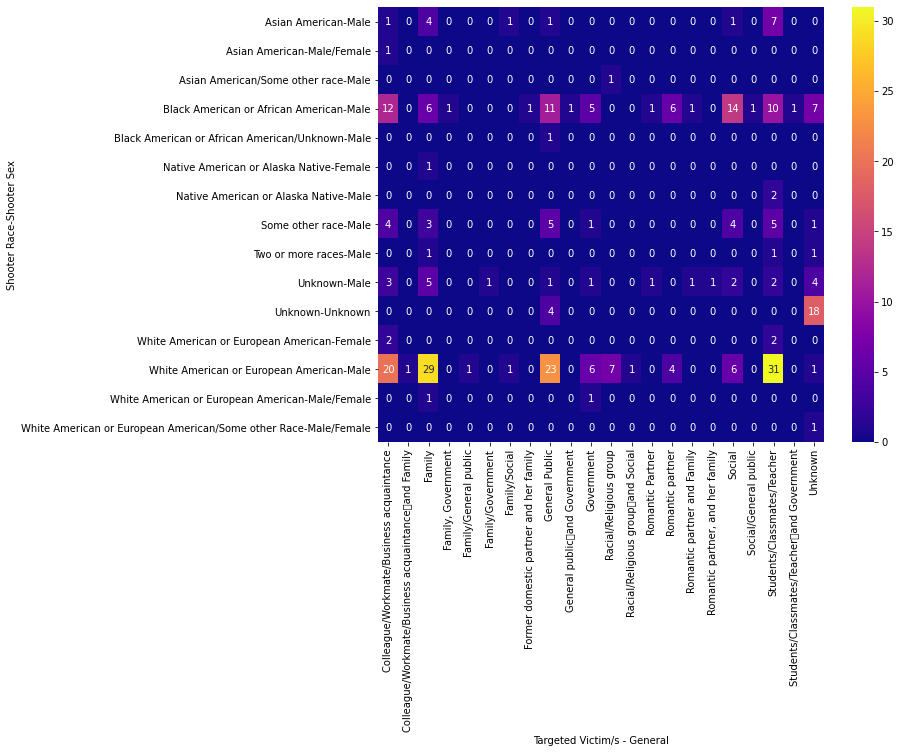

In [33]:
# Зависимость между расовой и половой принадлежностью преступника и выбором жертв
table = data.pivot_table(index=['Shooter Race', 'Shooter Sex'], 
                         columns=['Targeted Victim/s - General'],
                         aggfunc=np.count_nonzero)['CaseID'].fillna(0)
plt.figure(figsize=(10, 8))
sns.heatmap(table, cmap='plasma', annot=True)

In [34]:
cols = [('Black American or African American', 'Male'), ('White American or European American', 'Male')]
framed = table.T[cols]
for col in framed.columns:
    framed[col] = framed[col].apply(lambda x: round(x / sum(framed[col]), 3))
framed

Shooter Race,Black American or African American,White American or European American
Shooter Sex,Male,Male
Targeted Victim/s - General,,
Colleague/Workmate/Business acquaintance,0.154,0.153
Colleague/Workmate/Business acquaintance\rand Family,0.000,0.008
Family,0.077,0.221
"Family, Government",0.013,0.000
Family/General public,0.000,0.008
Family/Government,0.000,0.000
Family/Social,0.000,0.008
Former domestic partner and her family,0.013,0.000


Распределение выбора жертв у двух наиболее крупных групп преступников (мужчины-европеоиды и мужчины-чернокожие) различается. Чернокожие мужчины чаще, чем европеоиды, выбирали своими жертвами знакомых или соседей, а также романтических партнеров. Мужчины-европеоиды чаще, чем чернокожие, выбирали в качестве жертв семью, членов каких-либо расовых или религиозных групп, а также одноклассников, учителей или учеников.

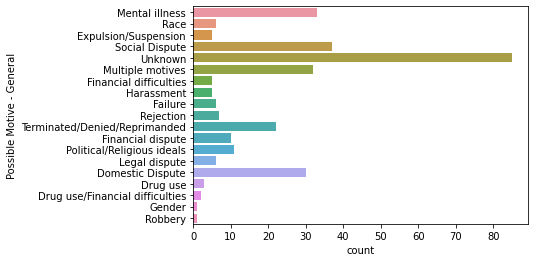

In [35]:
# Возможный мотив преступления
sns.countplot(y=data['Possible Motive - General'])

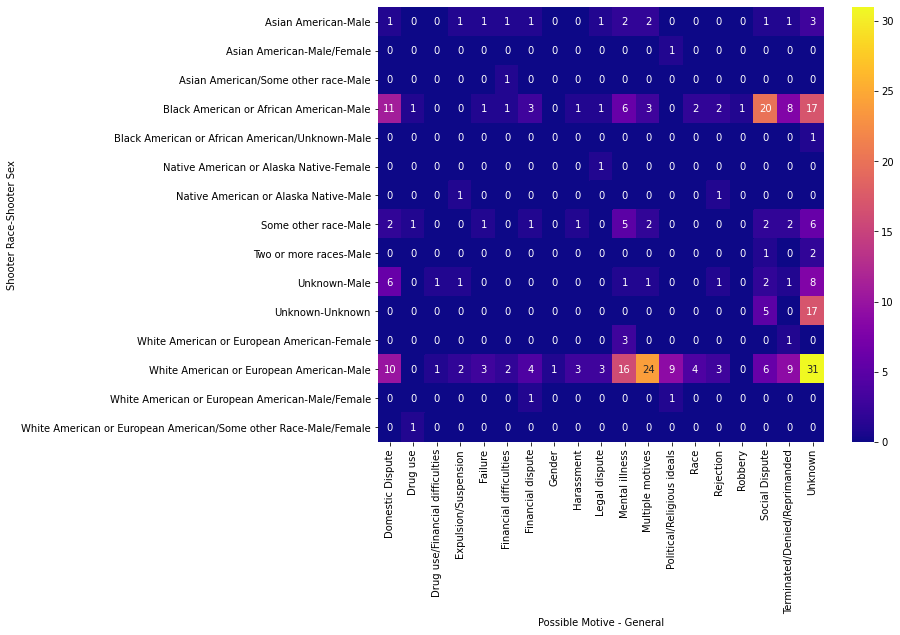

In [36]:
# Зависимость между расовой и половой принадлежностью преступника и возможным мотивом преступления
table = data.pivot_table(index=['Shooter Race', 'Shooter Sex'], 
                         columns=['Possible Motive - General'],
                         aggfunc=np.count_nonzero)['CaseID'].fillna(0)
plt.figure(figsize=(10, 8))
sns.heatmap(table, cmap='plasma', annot=True)

Здесь можно увидеть, что у чернокожих мужчин чаще, чем у европеоидов, возможным мотивом преступления становились ссоры с соседями, знакомыми или случайными людьми. У мужчин-европеоидов, в свою очередь, среди мотивов преступления чаще встречались психические расстройства, политические либо религиозные мотивы. Мужчины-европеоиды также выделяются большим количеством преступлений со смешанными мотивами.

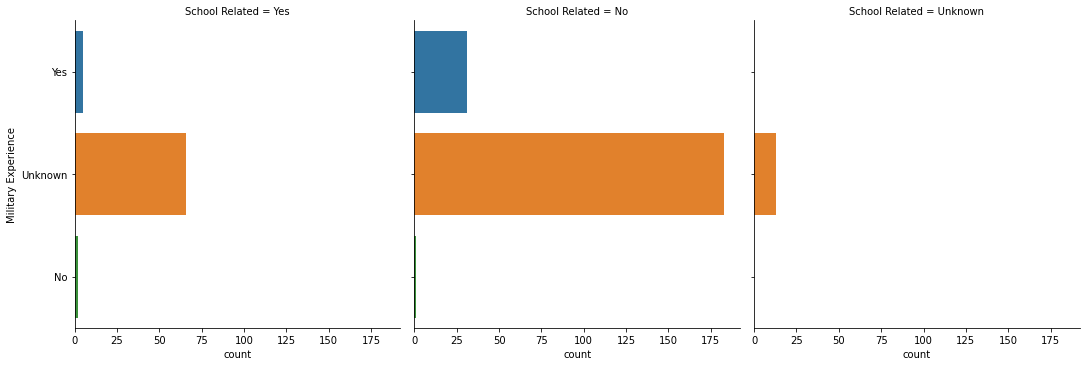

In [37]:
sns.catplot(y='Military Experience', col='School Related', data=data, kind='count')

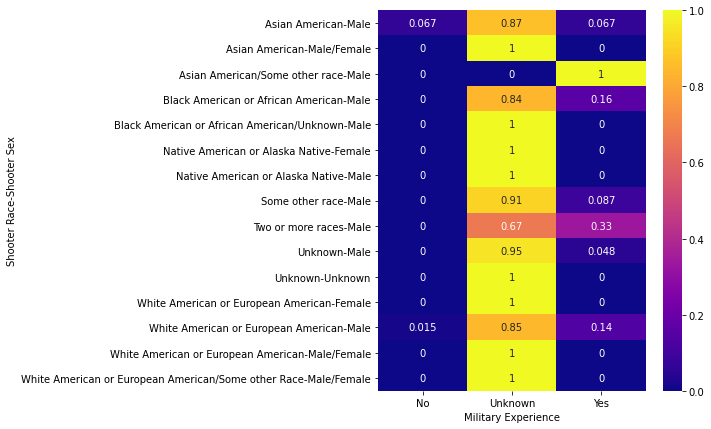

In [38]:
table = data.pivot_table(index='Military Experience', columns=['Shooter Race', 'Shooter Sex'], aggfunc=np.count_nonzero)['CaseID'].fillna(0)
for col in table.columns:
    table[col] = table[col].apply(lambda x: x / sum(table[col]))
plt.figure(figsize=(6, 7))
sns.heatmap(table.T, cmap='plasma', annot=True)

Только в небольшом количестве случаев преступники имели боевую подготовку. Распределение этих случаев относительно расы и пола преступника мало различается для наиболее распространенных расы и пола преступника.

### Данные, связанные с оружием

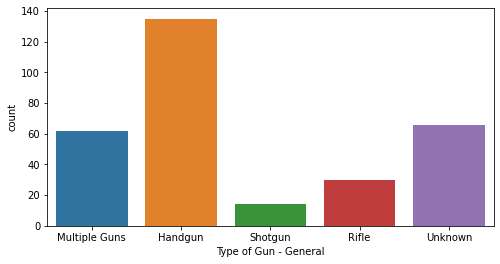

In [39]:
#Популярность разных типов оружия.
# Здесь обнаружилось, что в колонке "Type of Gun - General" также есть некорректные значения. Произведем замену
incorrect = {'handgun': 'Handgun', 'Multiple guns': 'Multiple Guns'}
for key in incorrect:
    data['Type of Gun - General'].replace(key, incorrect[key], inplace=True)
plt.figure(figsize=(8, 4))
sns.countplot(x=data['Type of Gun - General'])

Наиболее часто преступники использовали короткоствольное оружие. Реже всего использовался дробовик. Для получения более точной информации необходимо рассмотреть, какие виды оружия использовались в тех случаях, когда их было несколько.

In [40]:
weapon_cols = ['Number of Shotguns', 'Number of Handguns', 'Number of Automatic Guns', 'Number of Semi-Automatic Guns']
# Не во всех случаях известно, какое количество того или иного вида оружия использовал преступник, что затрудняет подсчет
data[(data[weapon_cols].apply(lambda x: any([sym.isalpha() for sym in x.to_list()]), axis=1)) &
    (data['Type of Gun - General']=='Multiple Guns')][weapon_cols]

,Number of Shotguns,Number of Handguns,Number of Automatic Guns,Number of Semi-Automatic Guns
205,0,1,Unknown,Unknown
208,Unknown,1,Unknown,Unknown
212,0,1,Unknown,1
221,0,5,Unknown,Unknown
224,Unknown,1,Unknown,Unknown
226,0,2,Unknown,1
242,0,1,Unknown,1
247,Unknown,1,Unknown,Unknown
289,Unknown,Unknown,Unknown,Unknown


In [41]:
# Однако таких случаев не очень много и возможно они не влияют на картину в целом. Попробуем суммировать количество 
# использованного оружия каждого вида, отбросив все строки с неизвестными
data[(data[weapon_cols].apply(lambda x: all([sym.isnumeric() for sym in x.to_list()]), axis=1)) &
    (data['Type of Gun - General']=='Multiple Guns')][weapon_cols].astype(int).sum()

Number of Shotguns               33
Number of Handguns               75
Number of Automatic Guns          2
Number of Semi-Automatic Guns    64
dtype: int64

Как видно, в тех случаях, когда преступники использовали несколько видов оружия, распределение схожее: чаще всего использовался пистолет или револьвер, реже всего применялся дробовик. Разница заключается в использовании полуавтоматического оружия - оно применялось почти так же часто, как и пистолеты и револьверы.

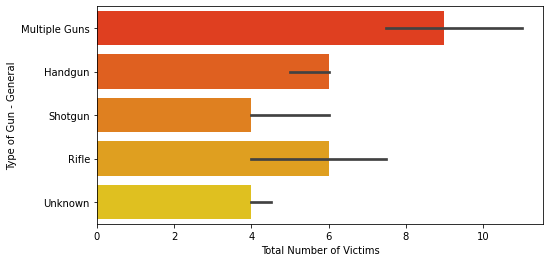

In [42]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Total Number of Victims', y='Type of Gun - General', data=data, estimator=np.median, palette='autumn')

Наибольшее количество жертв на одно преступление приходилось в тех случаях, когда использовалось несколько видов вооружения. Возможно, это связано с тем, что в таких случаях на руках у преступника было больше единиц оружия. Проверим, есть ли корреляция между числом единиц оружия и количеством жертв.

In [43]:
# Часть случаев, для которых неизвестно общее количество единиц оружия, придется отбросить.
data[data['Total Number of Guns']!='Unknown'][['Total Number of Victims', 'Total Number of Guns']].astype(int).corr()

,Total Number of Victims,Total Number of Guns
Total Number of Victims,1.000000,0.440103
Total Number of Guns,0.440103,1.000000


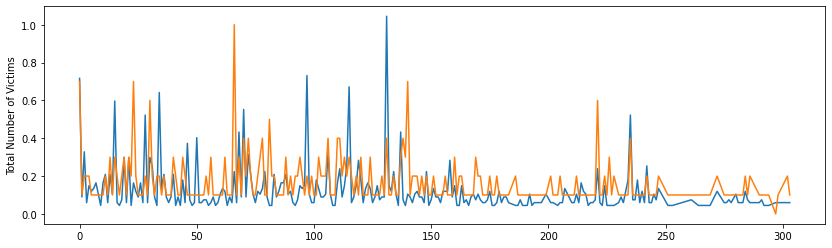

In [44]:
filtered = data[data['Total Number of Guns']!='Unknown']
plt.figure(figsize=(14, 4))
sns.lineplot(x=filtered.index, 
             y=filtered['Total Number of Victims'].apply(lambda x: x / (filtered['Total Number of Victims'].max() - filtered['Total Number of Victims'].min())),
            legend='full')
sns.lineplot(x=filtered.index, 
             y=filtered['Total Number of Guns'].apply(lambda x: int(x) / (filtered['Total Number of Guns'].astype(int).max() - filtered['Total Number of Guns'].astype(int).min())),
            legend='full')

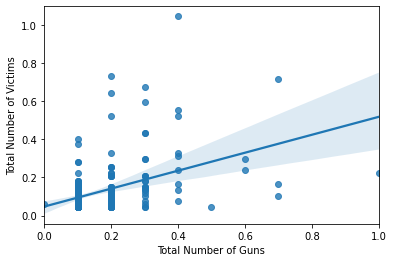

In [45]:
sns.regplot(x=filtered['Total Number of Guns'].apply(lambda x: int(x) / (filtered['Total Number of Guns'].astype(int).max() - filtered['Total Number of Guns'].astype(int).min())),
           y=filtered['Total Number of Victims'].apply(lambda x: x / (filtered['Total Number of Victims'].max() - filtered['Total Number of Victims'].min())))

Между количеством единиц оружия и числом жертв действительно есть небольшая корреляция.

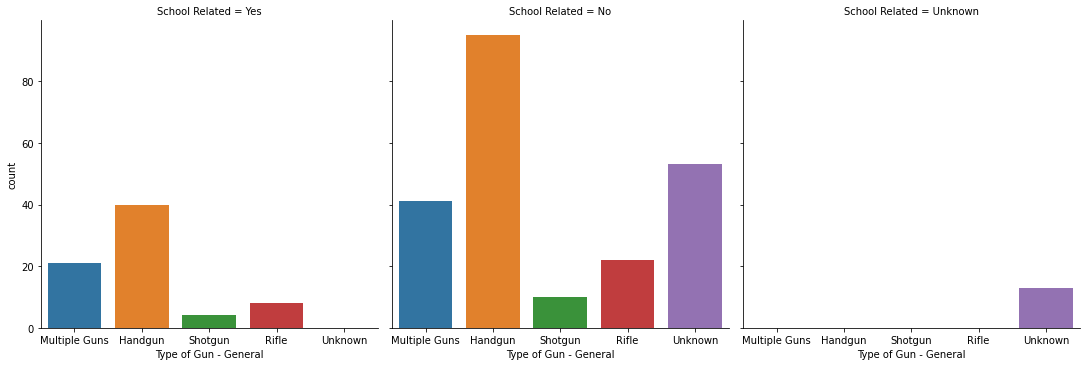

In [46]:
# Связь между видом использованного оружия и отношением преступления к школе
sns.catplot(x='Type of Gun - General', col='School Related', data=data, kind='count')

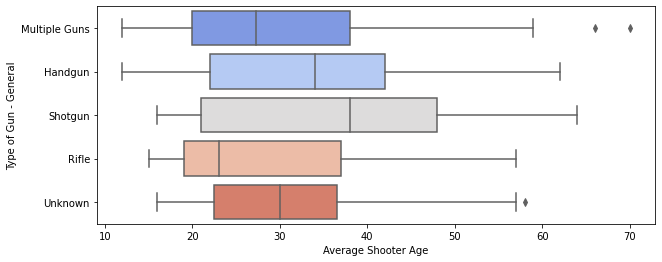

In [47]:
# Связь выбора оружия с возрастом преступника в тех случаях, когда он известен
filtered = data[data['Average Shooter Age'].apply(lambda x: not any([sym.isalpha() for sym in x]))]
plt.figure(figsize=(10, 4))
sns.boxplot(x=filtered['Average Shooter Age'].astype(float), y=filtered['Type of Gun - General'], palette='coolwarm')

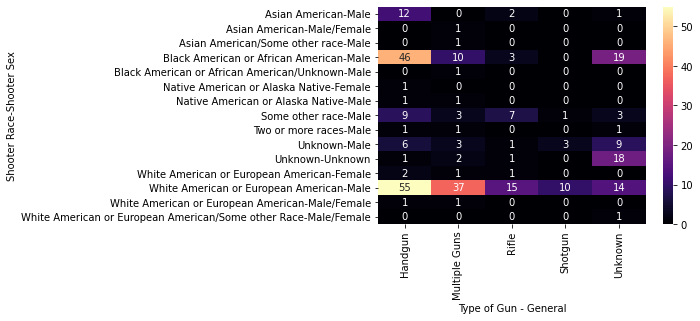

In [48]:
# Связь выбора оружия с полом и расой преступника
table = data.pivot_table(index=['Shooter Race', 'Shooter Sex'], 
                         columns=['Type of Gun - General'],
                         aggfunc=np.count_nonzero)['CaseID'].fillna(0)
sns.heatmap(table, cmap='magma', annot=True)

Винтовки и особенно дробовики применялись преимущественно преступниками-европеоидами.

Есть ли связь между выбором оружия и наличием у преступника психических расстройств?

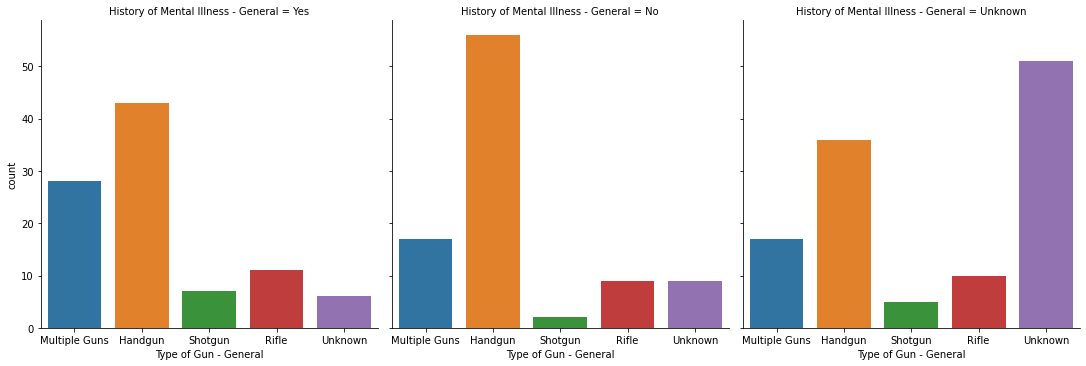

In [49]:
sns.catplot(x='Type of Gun - General', col='History of Mental Illness - General', data=data, kind='count')

По диаграмме можно предположить, что преступники без психических отклонений склонны использовать наиболее распространенный вид оружия (пистолеты и револьверы). Преступники с отклонениями чаще использовали несколько видов оружия. Для преступников, о психических заболеваниях которых ничего не известно, также чаще всего не известен вид оружия, вероятно из-за недостатка данных в целом.

### Связь с датой и местоположением:

Количество инцидентов в разные годы:

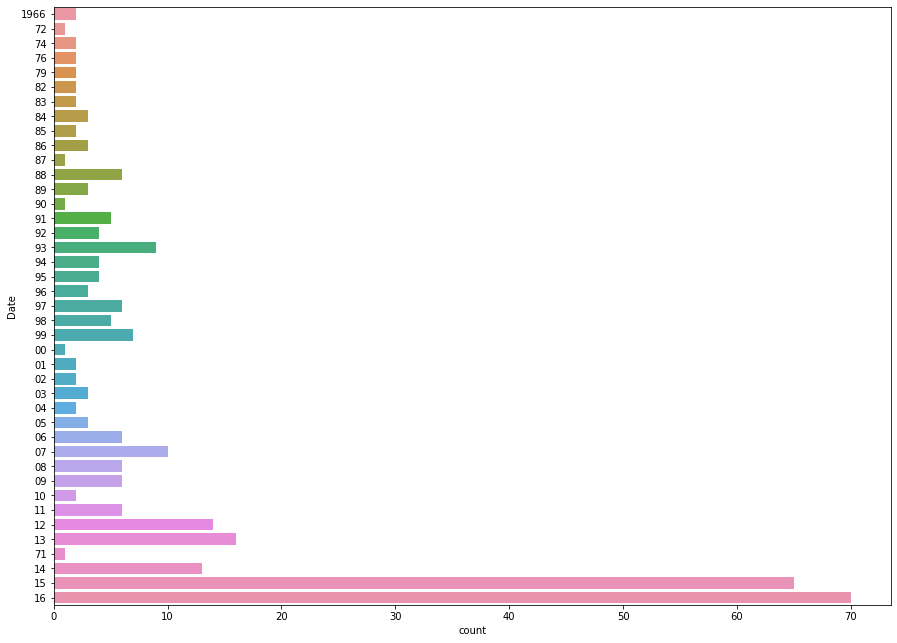

In [50]:
plt.figure(figsize=(15, 11))
sns.countplot(y=data['Date'].apply(lambda x: x.split('/')[2]))

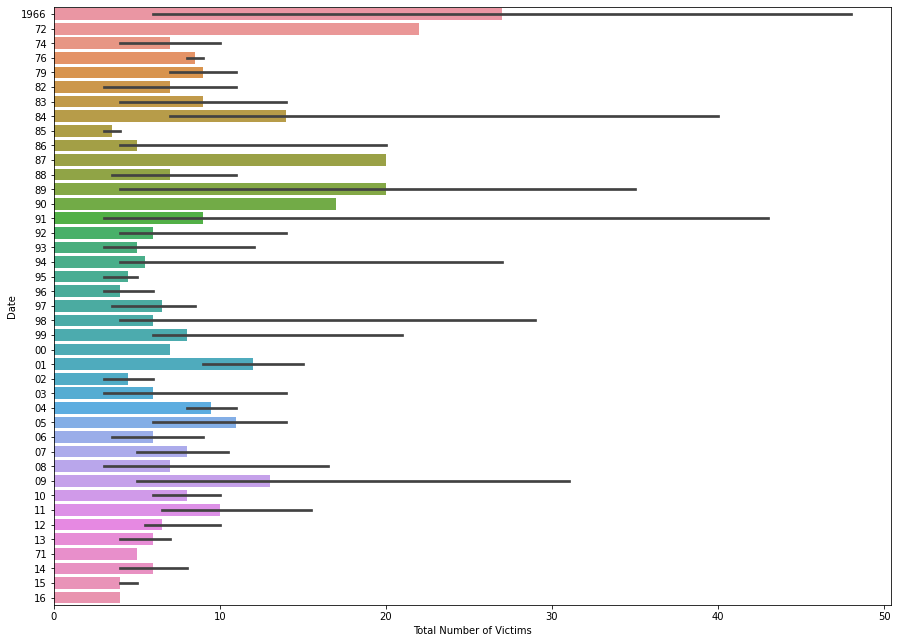

In [51]:
#Преобладающее общее число жертв в разные годы
plt.figure(figsize=(15, 11))
sns.barplot(x=data['Total Number of Victims'], y=data['Date'].apply(lambda x: x.split('/')[2]), estimator=np.median)

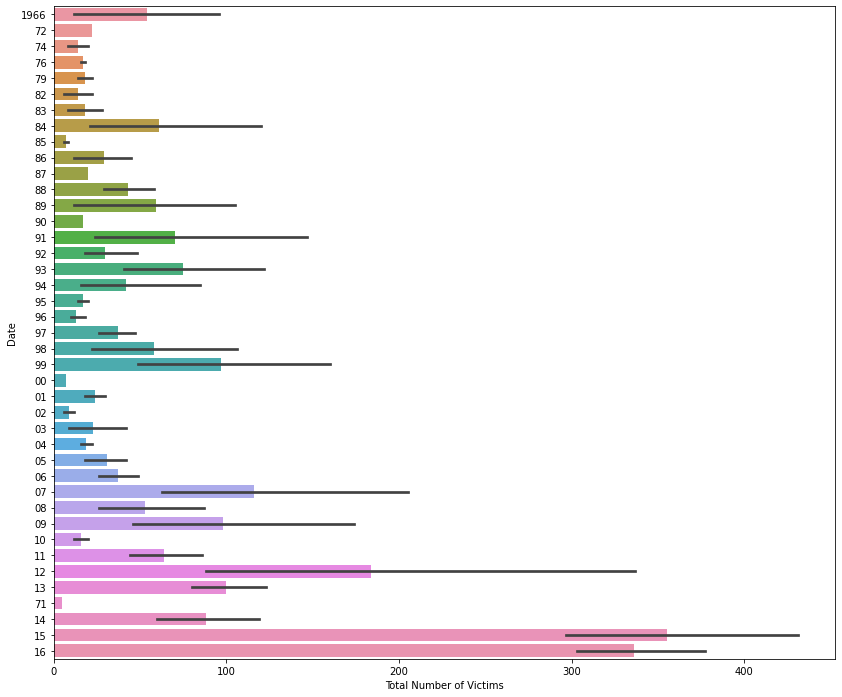

In [52]:
plt.figure(figsize=(14, 12))
sns.barplot(x=data['Total Number of Victims'], y=data['Date'].apply(lambda x: x.split('/')[2]), estimator=np.sum)

Как видно из графиков, за период с 1966 по 2016 год количество преступлений в год увеличилось, также как и суммарное число жертв этих преступлений за год. Однако преобладающее количество жертв на одно преступление стало меньше.

Количество инцидентов в разных штатах:

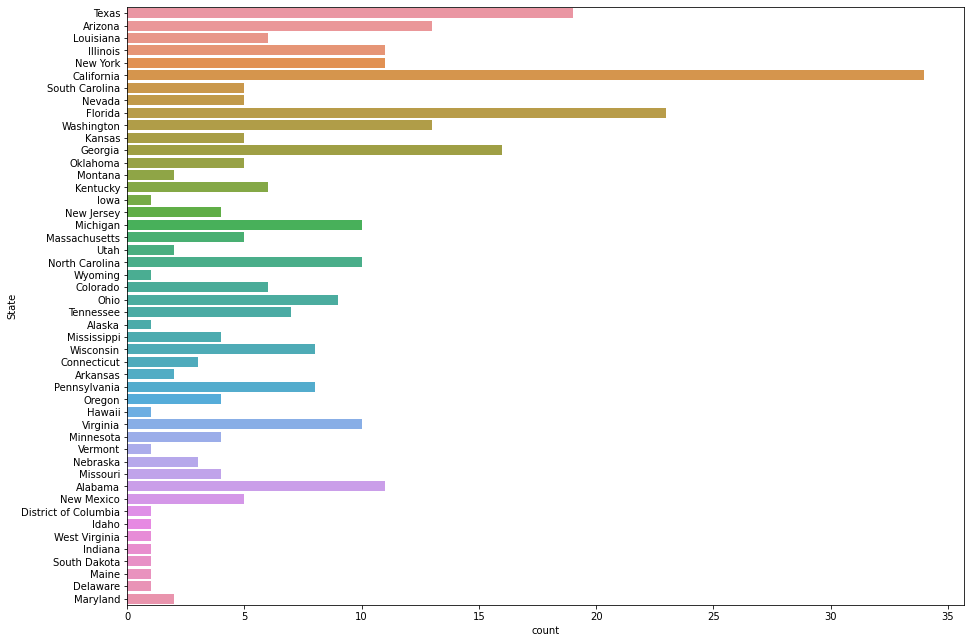

In [53]:
plt.figure(figsize=(15, 11))
sns.countplot(y=data['State'])

В датасете нет демографических данных по штатам и городам, в которых происходили преступления, поэтому в рамках данного обзора поиск каких-либо закономерностей в этой области невозможен.